## Proyecto 1

El objetivo de este proyecto es crear modelos predictivos de regresion lineal univariable de la forma y= Bo+B1*x
En donde y es la variable independiente
x es la variable dependiente
Beta cero es el intercepto de la recta
Beta uno es la pendiente de la recta. 


# Paso 1. Se cargan las librerías a utilizar en este proyecto.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns



# Paso 2. Carga de la Data

In [2]:

data= np.load('proyecto_training_data.npy')


In [3]:
dataset = pd.DataFrame (data, 
            columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [4]:
#Visualizacion de la data
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


# Paso 3 Data Imputation 
En ingeniería de Características existen varios criterios para el tratamiento de los datos faltantes, está la eliminación arbitraria "Complete Case Analysis" pero este criterio tiene el inconveniente que se podría eliminar datos importantes que podrían crear un sesgo en el modelo. 
También podemos encontrar el criterio de imputación de la Media y la Mediana, el cual se considera más acertado ya que no elimina datos. Aunque también podría conducir a sesgo o error al modelo, no obstante las observaciones faltantes podrían limitar la predicción de datos en el modelo. Se van a probar los criterios de asignar arbitrariamente el máximo valor de la columna de datos faltantes, también se va probar asignar la media y la mediana, finalmente se van a comparar los resultados para tomar la mejor decisión.

3.1 Revisamos que columnas de nuestro data set tienen datos nulos o faltantes

In [5]:
dataset_IA= dataset

In [6]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [7]:
cols_con_nan = getNanColNames(dataset_IA)
cols_con_nan

['LotFrontage']

In [8]:
dataset_IA[cols_con_nan].dtypes

LotFrontage    float64
dtype: object

In [9]:
dataset_IA[cols_con_nan].isnull().mean()

LotFrontage    0.177397
dtype: float64

In [10]:
def getNanGoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

In [11]:
cols_to_use = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

3.2 Criterio CCA - Asignación Arbitraria del Valor mayor y menor 

In [12]:
#Determinamos el máximo y mínimo valor de los datos
dataset_IA['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
#Imputamos los valores máximos y mínimos a los campos faltantes
dataset_IA1= dataset_IA
dataset_IA1['LotFrontage_313']= dataset_IA1['LotFrontage'].fillna(313)
dataset_IA1['LotFrontage_21']= dataset_IA1['LotFrontage'].fillna(21)

In [14]:
print("Varianza_original:", dataset_IA1['LotFrontage'].var())
print("Varianza_313:", dataset_IA1['LotFrontage_313'].var())
print("Varianza_21:", dataset_IA1['LotFrontage_21'].var())

Varianza_original: 589.7491687482642
Varianza_313: 9104.289751377877
Varianza_21: 836.384885031027


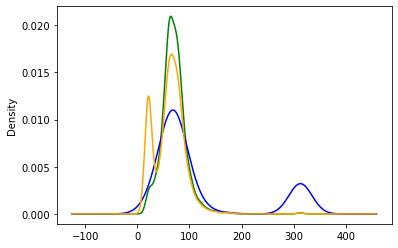

In [15]:
#Grafica
fig= plt.figure()
ax= fig.add_subplot(111)

dataset_IA1['LotFrontage'].plot.density(color="green", label="Original")
dataset_IA1['LotFrontage_313'].plot.density(color="blue", label="313")
dataset_IA1['LotFrontage_21'].plot.density(color="orange", label="21")
plt.show()

#Imputación de la Media y la Mediana

In [16]:
#Calculo  de la Media
meanValue = np.round(dataset_IA['LotFrontage'].mean(), 0)
meanValue

70.0

In [17]:
#Calculo  de la Mediana
medianValue= np.round(dataset_IA['LotFrontage'].median(), 0)
medianValue

69.0

In [18]:
dataset_meanImp = dataset_IA1['LotFrontage'].fillna(meanValue)

In [19]:
dataset_medianImp = dataset_IA1['LotFrontage'].fillna(medianValue)

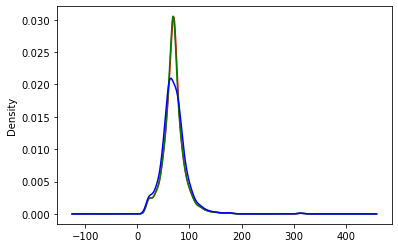

In [20]:
#Grafica
fig= plt.figure()
ax= fig.add_subplot(111)

dataset_meanImp.plot.density(color="red", label="Mean")
dataset_medianImp.plot.density(color="green", label="Median")
dataset_IA['LotFrontage'].plot.density(color="blue", label="Original")
plt.show()

In [21]:
np.corrcoef(dataset_meanImp, dataset['SalePrice'])[0,1]

0.33489718326981494

In [22]:
np.corrcoef(dataset_medianImp, dataset['SalePrice'])[0,1]

0.33477085313975996

Como se pudo observar en las gráficas, la distribución que se apega más a los datos originales es la imputación de la media o la mediana, en este caso se decidió llenar los datos faltantes con el valor de la mediana.

In [23]:
imputer = SimpleImputer(strategy = 'median', missing_values= np.nan)
imputer= imputer.fit(dataset_IA[cols_to_use])

In [24]:
dataset_IA[cols_to_use]= imputer.transform(dataset_IA[cols_to_use])

In [25]:
dataset_IA.drop('LotFrontage_313', axis=1, inplace=True)


In [26]:
dataset_IA.drop('LotFrontage_21', axis=1, inplace=True)

In [27]:
#Comprobacion de la eliminacion de los valores Faltantes
dataset_IA.isnull().mean()

SalePrice       0.0
OverallQual     0.0
1stFlrSF        0.0
TotRmsAbvGrd    0.0
YearBuilt       0.0
LotFrontage     0.0
dtype: float64

Revisamos si existen variables categóricas en nuestro dataset.

In [28]:
def getCategoryVars(df):
    colnames = df.columns
    cat_cols = []
    for col in colnames:
        if(df[col].dtype == 'object'):
            cat_cols.append(col)
    return cat_cols

In [29]:
cat_cols = getCategoryVars(dataset_IA)

Como se pudo observar el dataset no tiene ninguna variable categórica que codificar.

# 3. Analisis Exploratorio de los Datos

3.1 Para cada variable en dataset calcularemos la media, valor máximo, valor mínimo y la desviación estándar. Tal como se muestra a continuación, utilizaremos la función summary

In [30]:
summary= dataset_IA.describe()
summary

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,69.863699
std,79442.502883,1.382997,386.587738,1.625393,30.202904,22.027677
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,60.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,79.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


3.2 Para cada variable se calculará el rango (peak to peak)

In [31]:
rango= np.ptp(dataset_IA['LotFrontage'])
rango

292.0

In [32]:
rango= np.ptp(dataset_IA['OverallQual'])
rango

9.0

In [33]:
rango= np.ptp(dataset_IA['1stFlrSF'])
rango

4358.0

In [34]:
rango= np.ptp(dataset_IA['TotRmsAbvGrd'])
rango

12.0

In [35]:
rango= np.ptp(dataset_IA['YearBuilt'])
rango

138.0

In [36]:
rango= np.ptp(dataset_IA['SalePrice'])
rango

720100.0

3.3 Histograma de las Variables

<function matplotlib.pyplot.show(close=None, block=None)>

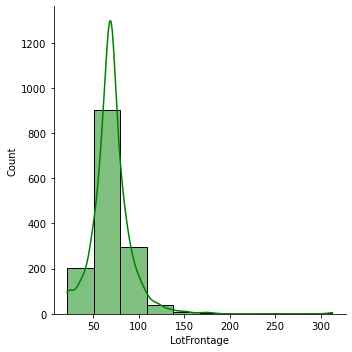

In [37]:
data1= dataset_IA['LotFrontage']
sns.displot(data1, bins= 10, color= "g", kde= True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

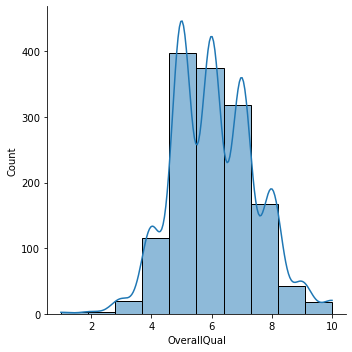

In [38]:
data2= dataset_IA['OverallQual']
sns.displot(data2, bins= 10, kde= True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

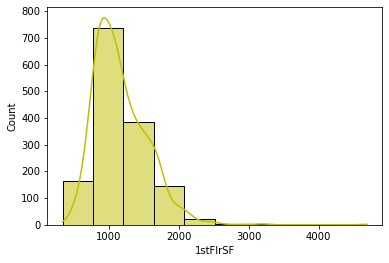

In [39]:
data3= dataset_IA['1stFlrSF']
sns.histplot(data3, bins= 10, color= "y", kde= True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

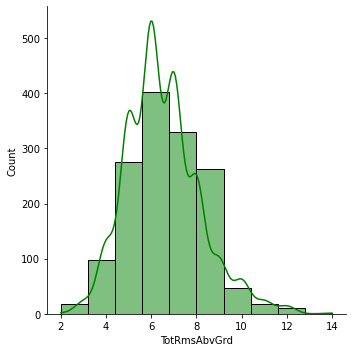

In [40]:
data4= dataset_IA['TotRmsAbvGrd']
sns.displot(data4, bins= 10, kde= True, color= "g")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

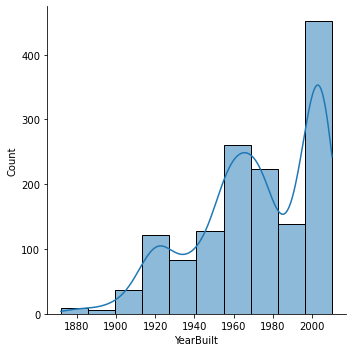

In [41]:
data5= dataset_IA['YearBuilt']
sns.displot(data5, bins= 10, kde= True)
plt.show

c:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

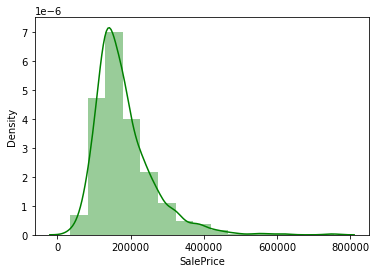

In [42]:
data5= dataset_IA['SalePrice']
sns.distplot(data5, bins= 15,  color= "g", kde= True)
plt.show

# Paso 4.  Graficas de Correlacion 
5.1 Calculo del Coeficiente de correlación entre cada variable x y variable y (SalePrice)

In [43]:
#Correlacion Variable  ~ SalePrice
CF_df= dataset_IA[['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage', 'SalePrice']]
CF_df= CF_df[~ CF_df['SalePrice'].isnull()]
CF_vars = list(CF_df)
del CF_vars[-1]
summary= []
for CF_type in CF_vars:
    corr_val = np.corrcoef(CF_df[CF_type], CF_df['SalePrice'])[1][0]
    summary.append(corr_val)

pd.DataFrame([summary], columns=CF_vars, index=['Correlacion Precios_de_Venta'])

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
Correlacion Precios_de_Venta,0.790982,0.605852,0.533723,0.522897,0.334771


<AxesSubplot:>

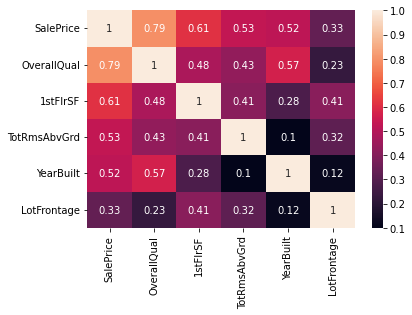

In [44]:
# Matriz de Correlacion
corrmat = dataset_IA.corr().round(2)
sns.heatmap(data=corrmat, annot=True)

5.2  Graficar Scatterplot entre cada variable X y Variable y

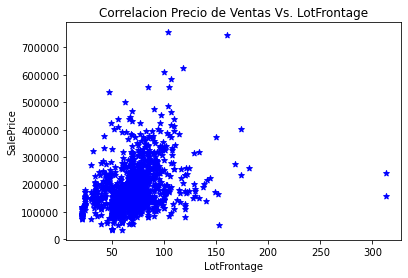

In [45]:
import matplotlib.pyplot as plt
x= dataset_IA['LotFrontage']
y= dataset_IA['SalePrice']
plt.scatter(x, y, color='b', marker='*')
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.title("Correlacion Precio de Ventas Vs. LotFrontage")
plt.show()

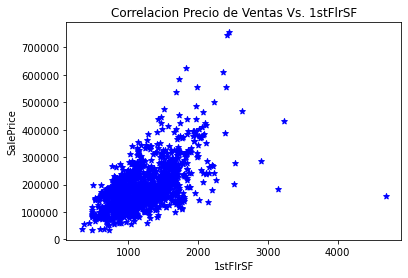

In [46]:
x= dataset_IA['1stFlrSF']
y= dataset_IA['SalePrice']
plt.scatter(x, y, color='b', marker='*')
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.title("Correlacion Precio de Ventas Vs. 1stFlrSF")
plt.show()

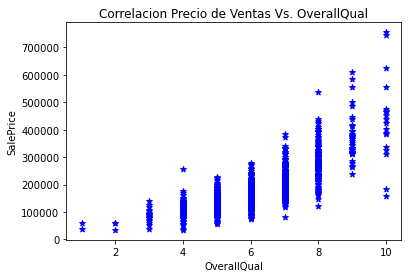

In [47]:
x= dataset_IA['OverallQual']
y= dataset_IA['SalePrice']
plt.scatter(x, y, color='b', marker='*')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Correlacion Precio de Ventas Vs. OverallQual")
plt.show()

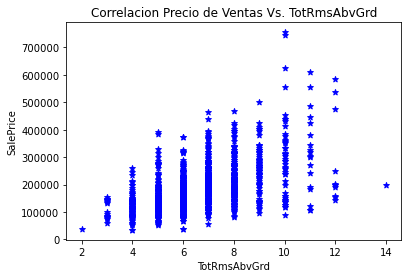

In [48]:
x= dataset_IA['TotRmsAbvGrd']
y= dataset_IA['SalePrice']
plt.scatter(x, y, color='b', marker='*')
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.title("Correlacion Precio de Ventas Vs. TotRmsAbvGrd")
plt.show()

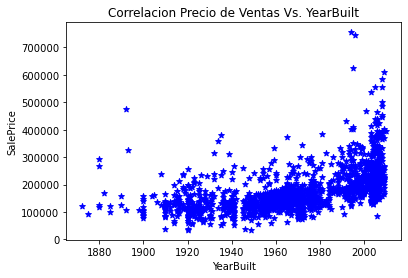

In [49]:
x= dataset_IA['YearBuilt']
y= dataset_IA['SalePrice']
plt.scatter(x, y, color='b', marker='*')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("Correlacion Precio de Ventas Vs. YearBuilt")
plt.show()

Al observar las graficas y la matriz de correlacion se puede observar que las variables con mas potencial predictivo son OverallQual y 1stFlrSF
ya que presentan mayor correlacion entre la variable y la dependiente en este caso SalePrice. Estas dos variables se utilizarán para el modelo predictivo del Precio de Venta.

# Paso 5. Splitting
Se divide el set de datos en Set de Entrenamiento y Set de Prueba, esta es una práctica común para algoritmos de aprendizaje supervisado. Train/Test es un método para medir la precisión del modelo, para este proyecto se utilizará 80% para entrenamiento y 20% para evaluar el modelo. 

In [50]:
X= dataset_IA[['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']]
y= dataset_IA[['SalePrice']]

In [51]:
#Split data into training and test data
train_x, test_X, train_y, test_y= train_test_split(X,y,
                                    train_size= 0.8,
                                    test_size= 0.2, random_state= 42 )

In [52]:
#Print Training and Test Sets
print(); print(train_x.shape)
print(); print(train_y.shape)
print(); print(test_X.shape)
print(); print(test_y.shape)


(1168, 5)

(1168, 1)

(292, 5)

(292, 1)


In [53]:
print(train_x.shape)

(1168, 5)


In [54]:
train_y.head()

,SalePrice
254,145000.0
1066,178000.0
638,85000.0
799,175000.0
380,127000.0


# Paso 6. Funcion para entrenar el modelo de Regresion lineal de la variable OverallQual

In [55]:
x = train_x['OverallQual']
y = train_y['SalePrice']
epochs = 99
imprimir_error_cada = 10 
learning_rate = 1

unos = np.ones(np.shape(x)).reshape(-1,1)
x = x.to_numpy().reshape(-1,1)
A = np.hstack([x, unos])
errores = []
b0 = 10
b1 = 20

for i in range(epochs):
    betas = np.array([b1,b0]).reshape(-1,1)
    yEstimado = np.matmul(A, betas) # Evaluamos el modelo con los betas default.

#Calculamos el gradientes de B0 y B1
    gradienteB0 = np.mean(yEstimado - y.to_numpy())
    gradienteB1 = np.mean((yEstimado - y.to_numpy())*x)

#Calculamos el valor de B0 y B1
    b0 = b0 - learning_rate*gradienteB0
    b1 = b1 - learning_rate*gradienteB1

#Error del costo
    if((i % imprimir_error_cada) == 0):
           errores.append(np.mean((yEstimado - y.to_numpy())**2)*1/2)
    
       
       # return b0, b1, errores
    
    
print("Beta0: ", b0)
print("Beta1: ", b1)

Beta0:  2.975800043890722e+161
Beta1:  1.9102485611901245e+162


In [56]:
errores

[19418772328.857334,
 1.2096078543815498e+42,
 9.324623099673647e+73,
 7.18816396867912e+105,
 5.541210694341627e+137,
 4.271607616753972e+169,
 3.292896198685059e+201,
 2.5384272967362003e+233,
 1.9568224298684306e+265,
 1.5084749628084956e+297]

# Paso 7: Modelo mediante Sklearn

In [57]:
X = dataset_IA[['OverallQual']]
y = dataset_IA['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [58]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit( X = X_train.reshape(-1,1) , y= Y_train)

LinearRegression()

In [59]:
print("Intercept:", lin_model.intercept_)
print("Coeficiente:", list(zip(X.columns, lin_model.coef_.flatten(), )))


Intercept: [-90233.22290028]
Coeficiente: [('OverallQual', 44379.877670982925)]


In [60]:
#Evaluacion del Modelo con la data de entrenamiento
train_y_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, train_y_predict)))
r2 = r2_score(Y_train, train_y_predict)


In [61]:
print("El resultado del modelo para los datos de entrenamiento es:")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2  es {}'.format(r2))
print("\n")

El resultado del modelo para los datos de entrenamiento es:
--------------------------------------
RMSE es 47789.62867359156
R2  es 0.6170962665508342




In [62]:
#Evaluacion del modelo con los datos de Testeo
test_y_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, test_y_predict)))
r2 = r2_score(test_y, test_y_predict)


In [63]:
print("El resultado del modelo para los datos de testeo es:")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2  es {}'.format(r2))
print("\n")

El resultado del modelo para los datos de testeo es:
--------------------------------------
RMSE es 51778.62651238531
R2  es 0.6504677778896862




# Funcion para la Variable '1stFlrSF'

In [64]:
x = train_x['1stFlrSF']
y = train_y['SalePrice']
epochs = 25
imprimir_error_cada = 10 
learning_rate = 1

unos = np.ones(np.shape(x)).reshape(-1,1)
x = x.to_numpy().reshape(-1,1)
A = np.hstack([x, unos])
errores = []
b0 = 0
b1 = 0

for i in range(epochs):
    betas = np.array([b1,b0]).reshape(-1,1)
    yEstimado = np.matmul(A, betas) # Evaluamos el modelo con los betas default.

#Calculamos el gradientes de B0 y B1
    gradienteB0 = np.mean(yEstimado - y.to_numpy())
    gradienteB1 = np.mean((yEstimado - y.to_numpy())*x)

#Calculamos el valor de B0 y B1
    b0 = b0 - learning_rate*gradienteB0
    b1 = b1 - learning_rate*gradienteB1

#Error del costo
    if((i % imprimir_error_cada) == 0):
           errores.append(np.mean((yEstimado - y.to_numpy())**2)*1/2)
    
       
       # return b0, b1, errores
    
    
print("Beta0: ", b0)
print("Beta1: ", b1)

Beta0:  3.596210376132685e+153
Beta1:  4.6646747017720125e+156


In [65]:
errores

[19442791762.85489, 6.16399562564059e+133, 2.5604202590031437e+257]

# Modelo Sklearn Variable 1stFlrSF

In [66]:
X1 = dataset_IA[['1stFlrSF']]
Y1 = dataset_IA['SalePrice']

xtrain, xtest, ytrain, ytest = train_test_split(
                                        X1.values.reshape(-1,1),
                                        Y1.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [67]:
lin_model2 = LinearRegression()
lin_model2.fit( X = xtrain.reshape(-1,1) , y= ytrain)

LinearRegression()

In [68]:
print("Intercept:", lin_model2.intercept_)
print("Coeficiente:", list(zip(X1.columns, lin_model2.coef_.flatten(), )))

Intercept: [44079.78895634]
Coeficiente: [('1stFlrSF', 117.46802071376966)]


In [69]:
#Evaluacion del Modelo con la data de entrenamiento
train_y_predict2 = lin_model2.predict(xtrain)
rmse = (np.sqrt(mean_squared_error(ytrain, train_y_predict2)))
r2 = r2_score(ytrain, train_y_predict2)

In [70]:
print("El resultado del modelo para los datos de entrenamiento es:")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2  es {}'.format(r2))
print("\n")

El resultado del modelo para los datos de entrenamiento es:
--------------------------------------
RMSE es 62475.2803910285
R2  es 0.34560689215138896


